# Digit Recognizer - NN

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.optimizers import Adam

## Importing Data and data Preprocessing

In [2]:
#Spliting the data to train and dev sets
(x_train, y_train), (x_dev, y_dev) = keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, -1)
x_dev = np.expand_dims(x_dev, -1)

In [3]:
#Normalizing the data 
x_train = x_train / 255.0
x_dev = x_dev / 255.0

In [4]:
#Reshaping the data 
x_train = x_train.reshape(-1,28,28,1)
x_dev = x_dev.reshape(-1,28,28,1)

In [5]:
#Encoding the Labels
y_train = to_categorical(y_train, num_classes = 10)
y_dev = to_categorical(y_dev, num_classes = 10)

## Model Making and training

In [6]:
#Building the Model
Model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

In [7]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
_________________________________________________________________


In [8]:
#Declaring Hyperparametrs
batch_size = 64
epochs = 15
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [9]:
# Training Model
Model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = Model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 2s 2ms/step - loss: 0.2269 - accuracy: 0.9310 - val_loss: 0.1389 - val_accuracy: 0.9595
Epoch 2/15
844/844 [==============================] - 2s 2ms/step - loss: 0.1247 - accuracy: 0.9611 - val_loss: 0.1315 - val_accuracy: 0.9618
Epoch 3/15
844/844 [==============================] - 2s 2ms/step - loss: 0.0926 - accuracy: 0.9713 - val_loss: 0.0976 - val_accuracy: 0.9715
Epoch 4/15
844/844 [==============================] - 2s 2ms/step - loss: 0.0749 - accuracy: 0.9758 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 5/15
844/844 [==============================] - 2s 2ms/step - loss: 0.0634 - accuracy: 0.9796 - val_loss: 0.1132 - val_accuracy: 0.9693
Epoch 6/15
844/844 [==============================] - 2s 2ms/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.1047 - val_accuracy: 0.9737
Epoch 7/15
844/844 [==============================] - 2s 2ms/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0978 - val_accuracy: 0.9747
Epoch 

## Model Evaluation

In [10]:
score = Model.evaluate(x_dev, y_dev, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09617915004491806
Test accuracy: 0.9787999987602234


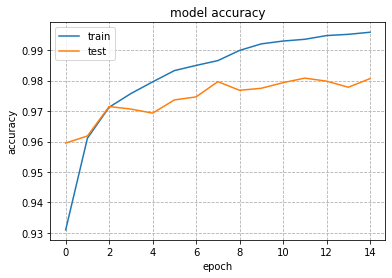

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(linestyle="--")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

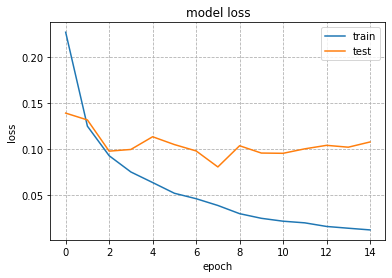

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(linestyle="--")
plt.legend(['train', 'test'], loc='upper right')
plt.show()